In [1]:
%pip install opencv-python numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os, cv2, numpy as np, pandas as pd, matplotlib

Note: using dataset from here: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

In [3]:
# !curl -L -o tbc.zip https://www.kaggle.com/api/v1/datasets/download/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

In [4]:
# !unzip -oq tbc.zip

In [5]:
import os
import sys

module_path = os.path.abspath(".")

# if module_path not in sys.path:
sys.path.append(module_path)

import dataset
import segmentation
from dataset import *
from segmentation import *

In [6]:
x_normal, x_tb = get_dataset()
x_normal_test, x_tb_test = get_dataset_test()

In [7]:
x_normal[0].shape

(132, 132)

In [8]:
# x_tb

In [9]:
x_tb[0].shape

(132, 132)

In [10]:
from matplotlib import pyplot

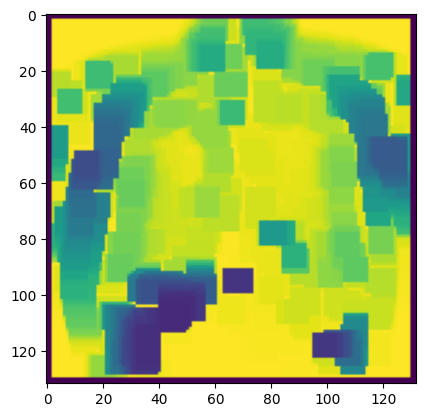

In [11]:
pyplot.imshow(x_normal[0])

In [12]:
# np.array(x_normal,dtype=np.float32)

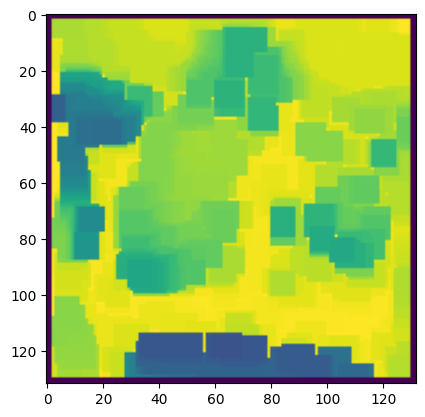

In [13]:
pyplot.imshow(x_tb[0])

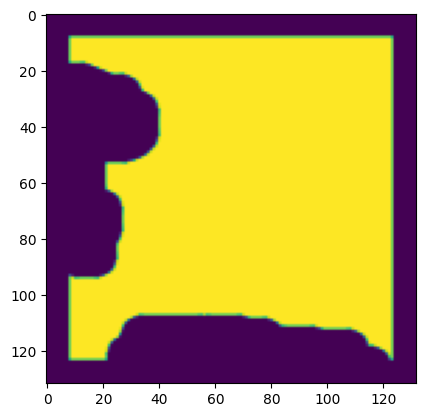

In [14]:
pyplot.imshow(get_segmentation(x_tb[0]))

In [15]:
np.array(x_tb).shape

(700, 132, 132)

In [16]:
x=[get_segmentation(x) for x in x_normal[:len(x_tb)]]
y=["normal"]*len(x_normal[:len(x_tb)])
x=x+[get_segmentation(x) for x in x_tb]
y=y+["tb"]*len(x_tb)
dict = {
    "x": np.asarray(x),
    "y": np.asarray(y)
}

x_test=[get_segmentation(x_test) for x_test in x_normal_test]
y_test=["normal"]*len(x_normal_test)
x_test=x_test+[get_segmentation(x_test) for x_test in x_tb_test]
y_test=y_test+["tb"]*len(x_tb_test)
dict_test = {
    "x": np.asarray(x_test),
    "y": np.asarray(y_test)
}

In [17]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
import sklearn.ensemble as en
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC

In [19]:
dict["x"].shape

(1400, 132, 132)

In [20]:
X_reshaped = dict["x"].reshape(dict["x"].shape[0], dict["x"].shape[1]*dict["x"].shape[2])
X_reshaped_test = dict_test["x"].reshape(dict_test["x"].shape[0], dict_test["x"].shape[1]*dict_test["x"].shape[2])

In [21]:
# X_reshaped

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_reshaped, dict["y"] ,
                                   random_state=42,
                                   test_size=0.2,
                                   shuffle=True)

In [23]:
le = LabelEncoder()
new_y_train = le.fit_transform(y_train)
new_y_val = le.fit_transform(y_val)

In [24]:
X_train.shape

(1120, 17424)

In [25]:
y_train.shape

(1120,)

In [26]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


In [ ]:
from sklearn.feature_selection import RFE
param_dist = {
    'C': np.logspace(-3, 3, 10),  # Log scale for regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_dist,
#     n_iter=100,  # Number of parameter settings that are sampled
#     cv=5,  # Number of cross-validation folds
#     verbose=2,
#     scoring="accuracy",
#     random_state=42,
#     n_jobs=-1  # Use all available processors
# )

# rfe = RFE(estimator=model, n_features_to_select=2662, step=0.5)

In [28]:
# clf = RandomForestClassifier(max_depth=2, random_state=42, verbose=True)

In [29]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1120, 17424), dtype=uint8)

In [30]:
X_val

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(280, 17424), dtype=uint8)

In [ ]:
model.fit(X_train, new_y_train)
# random_search.fit(X_train, new_y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
result = model.predict(X_reshaped_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
# trainres =model.predict(X_train)

In [35]:
# accuracy_score(y_train, trainres)

In [36]:
# accuracy_score(new_y_val, result)

In [37]:
new_y_test = le.fit_transform(dict_test['y'].astype(str))

In [38]:
accuracy_score(new_y_test, result)

0.7276086956521739

In [41]:
from sklearn.metrics import classification_report
print(classification_report(new_y_test, result))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      3800
           1       0.34      0.63      0.44       800

    accuracy                           0.73      4600
   macro avg       0.62      0.69      0.63      4600
weighted avg       0.81      0.73      0.75      4600



In [ ]:
from joblib import dump, load
dump(model, "svc.joblib")

['svc.joblib']